# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import random

%matplotlib inline

Таблица Indian liver pations records.

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [3]:
from sklearn.linear_model import LinearRegression
Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Total_Bilirubin).reshape(-1,1), Direct_Bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.1811674367972489
slope: [0.39557996]


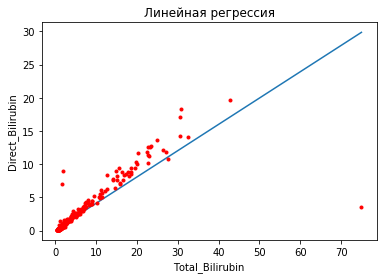

In [4]:
plt.xlabel('Total_Bilirubin')
plt.ylabel('Direct_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(Total_Bilirubin), max(Total_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Total_Bilirubin, Direct_Bilirubin, 'r.')
plt.show()

In [5]:
model.predict(np.array([20]).reshape(-1, 1))

array([8.09276669])

In [6]:
data[['Total_Bilirubin', 'Direct_Bilirubin']].query('Total_Bilirubin == 20').head()

,Total_Bilirubin,Direct_Bilirubin
509,20.0,10.0


Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

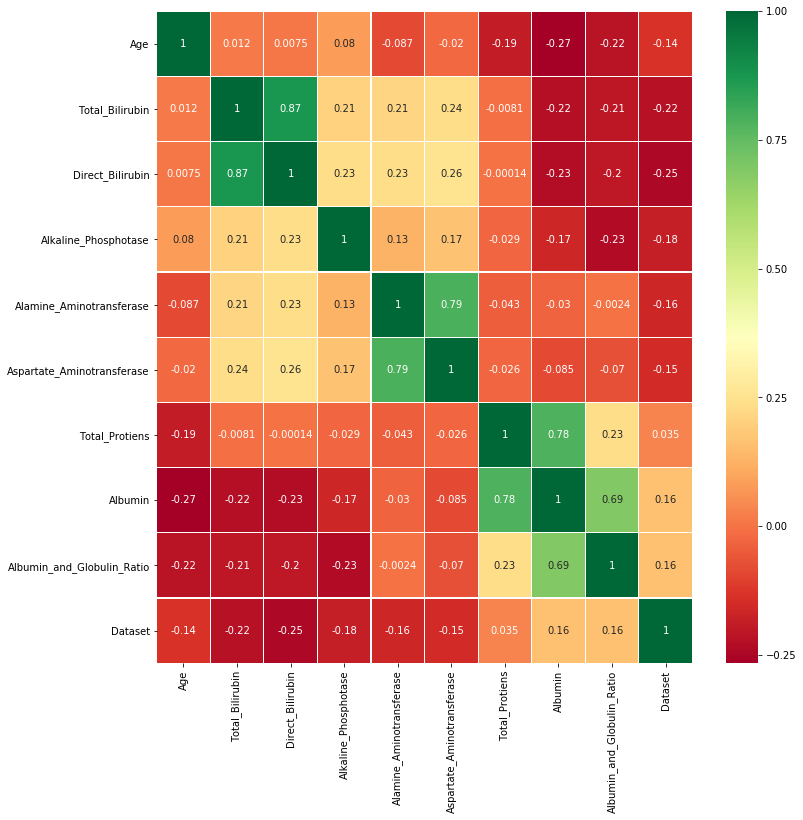

In [7]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [8]:
dir_bil = data['Direct_Bilirubin']
alc_phosph = data['Alkaline_Phosphotase']
target = data['Dataset']
x = np.vstack([np.array(dir_bil), np.array(alc_phosph)]).T
y = np.array(target)
model = LinearRegression().fit(x, y)

In [9]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 1.4105809528676787
slope: [-0.03455122 -0.00025048]


In [10]:
print(x[4:5])
print('Предсказание модели: ', model.predict(x[4:5]))
print('Значение в исходных данных:')
data[['Direct_Bilirubin', 'Alkaline_Phosphotase', 'Dataset']].query('Direct_Bilirubin == 2 and Alkaline_Phosphotase == 195').head()

[[  2. 195.]]
Предсказание модели:  [1.2926341]
Значение в исходных данных:


,Direct_Bilirubin,Alkaline_Phosphotase,Dataset
4,2.0,195,1


Посчитать квартили для всех колонок. 

In [11]:
data.quantile([.25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

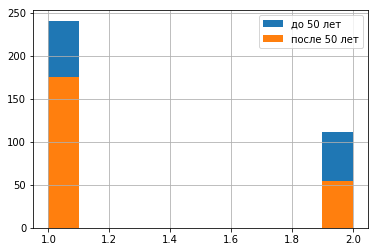

медиана (0.5 квантиль) по флагу наличия болезни для людей до 50 лет
до 50 лет:  1.0 после 50 лет 1.0
среднее по флагу наличия болезни для людей до 50 лет
до 50 лет:  1.3172804532577904 после 50 лет 1.2391304347826086


In [12]:
before_50 = data[data['Age'] < 50]['Dataset']
after_50 = data[data['Age'] >= 50]['Dataset']
before_50.hist()
after_50.hist()
plt.legend(['до 50 лет', 'после 50 лет'])
plt.show()

print("медиана (0.5 квантиль) по флагу наличия болезни для людей до 50 лет")
print("до 50 лет: ", before_50.quantile(.5), "после 50 лет",  after_50.quantile(.5))

print("среднее по флагу наличия болезни для людей до 50 лет")
print("до 50 лет: ", before_50.mean(), "после 50 лет",  after_50.mean())

получилось, что в обеих выборках не менее половины респондентов имеют болезни печени. 
В группе после 50 лет среднее значение меньше, чем в группе после 50 лет, т.е. в этой выборке больше вероятность болезни печени, чем в группе до 50 лет.


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [13]:
liver_patient = data[data['Dataset'] == 1]['Total_Bilirubin']
stats.ttest_1samp(liver_patient, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

p-value равно 0.01, что меньше стандартной альфа ошибки 0.05, поэтому мы можем сказать, что имеется статистическое различие между общм билирубином больных и генеральной совокупности в целом.

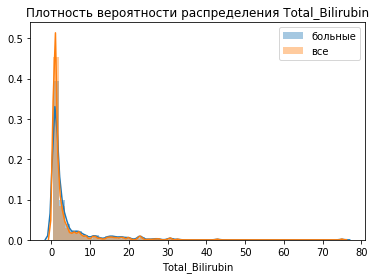

In [14]:
#??? у меня по графикам получается очень даже похожие выборки, обман зрения?
sns.distplot(liver_patient)
sns.distplot(data['Total_Bilirubin'])
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['больные', 'все'])
plt.show()

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [15]:
liver_patient = data[data['Dataset'] == 1]['Total_Bilirubin']
non_liver_patient = data[data['Dataset'] == 2]['Total_Bilirubin']
stats.ttest_ind(liver_patient, non_liver_patient)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

p-value меньше стандартной альфа ошибки 0.05, поэтому можно сказать, что есть статистическое различие между общим билирубином больных и здоровых.

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [16]:
group_0 = data[data['Age'] <= 30 ]['Dataset']
group_1 = data.query("30 < Age < 55")['Dataset']
group_2 = data[data['Age'] >= 55 ]['Dataset']

print('длины выборок:\n', group_0.count(), '\n', group_1.count(), '\n', group_2.count())
#выборки разной размерности, беру случайные 115 строчек по наименьшей длине группы (это законно или нужно применять другой критерий?)
stats.f_oneway(group_0
               , group_1.reindex(np.random.permutation(group_1.index)).head(115)
               , group_2.reindex(np.random.permutation(group_2.index)).head(115)
              )

длины выборок:
 115 
 292 
 176


F_onewayResult(statistic=11.409042834479113, pvalue=1.597373796084052e-05)

Вопросы задавать на почту yustiks@gmail.com